In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [2]:
import warnings
warnings.simplefilter('ignore')

In [3]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

### Read the dataset for churn 

In [4]:
df = pd.read_csv("new_variant_1.csv")

In [5]:
df.replace({
    'Status':{
        'Yes': 0,
        'No': 1,
    },

}, inplace=True)
df.head()


,ID,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status
0,24890,0,3,0,0,0,0,0,1,-1.238773,4.045968,0.446221,-0.001005,360.0,1,1,1,-1.390294,1,1,0,0,-1.274916,3,758,0,2,1,98.728814,3,1,1
1,24891,0,2,0,1,0,0,0,0,-0.696280,4.045968,0.446221,-0.001005,360.0,1,1,0,-0.001274,1,1,0,0,-0.391089,2,552,1,5,1,73.134888,0,1,1
2,24892,0,2,1,0,0,0,0,1,0.509260,4.560000,0.200000,-0.990868,360.0,0,1,1,0.161969,1,1,0,0,0.836448,3,834,0,2,1,80.019685,3,1,0
3,24893,0,2,0,0,3,0,0,1,0.810645,4.250000,0.681000,-0.001005,360.0,1,1,1,0.758993,1,1,0,0,1.491135,3,587,0,4,0,69.376900,0,1,0
4,24894,0,1,1,0,0,0,0,1,2.257294,4.000000,0.304200,-1.220701,360.0,1,1,1,1.157009,1,1,0,0,1.098323,1,602,1,2,0,91.886544,0,1,0


# Modelling and Validation

#### Define target and features columns

In [6]:
X = df.drop(columns='Status')
y = df['Status']

In [7]:
# Let's say we want to split the data in 80:10:10 for train:valid:test dataset
# In the first step we will split the data in training and remaining dataset
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.8)

# Now since we want the valid and test size to be equal (10% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)
print(X_test.shape)
print(y_test.shape)


(115318, 31)
(115318,)
(14415, 31)
(14415,)
(14415, 31)
(14415,)


Для оцінки моделей використовуються наступні метрики:

Accuracy (Точність) - це частка правильних прогнозів серед усіх прикладів. Для збалансованих наборів даних, де класи приблизно рівні за кількістю, точність є хорошим показником. Однак для незбалансованих даних (де один клас переважає), точність може бути неправильною, оскільки модель може правильно передбачати переважний клас і все одно мати високу точність.

Recall (Повнота) - це частка правильно передбачених позитивних прикладів серед усіх реальних позитивних прикладів. У задачах, де важливо мінімізувати пропуск важливих випадків (наприклад, коли потрібно ідентифікувати шахрайство), повнота є ключовою метрикою.

F1-міра - це середнє гармонійне між точністю і повнотою. F1-міра особливо корисна в ситуаціях, де дані є незбалансованими, і потрібно знайти баланс між правильною класифікацією позитивних і негативних класів.

In [8]:
models = { 'LogisticRegression' : LogisticRegression(class_weight='balanced'), 'KNeighborsClassifier' : KNeighborsClassifier(weights='distance') }

In [9]:
classifiers = dict()
for name, model in models.items():
    print('training ',name)
    classifier = model
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print('test set metrics: \n', metrics.classification_report(y_test, y_pred))
    y_pred = classifier.predict(X_valid)
    print('validation set metrics: \n', metrics.classification_report(y_valid, y_pred))
    classifiers[name] = classifier


training  LogisticRegression
test set metrics: 
               precision    recall  f1-score   support

           0       0.82      0.57      0.67     10811
           1       0.32      0.62      0.42      3604

    accuracy                           0.58     14415
   macro avg       0.57      0.59      0.55     14415
weighted avg       0.69      0.58      0.61     14415

validation set metrics: 
               precision    recall  f1-score   support

           0       0.82      0.58      0.68     10900
           1       0.32      0.62      0.42      3515

    accuracy                           0.59     14415
   macro avg       0.57      0.60      0.55     14415
weighted avg       0.70      0.59      0.62     14415

training  KNeighborsClassifier
test set metrics: 
               precision    recall  f1-score   support

           0       0.75      0.88      0.81     10811
           1       0.26      0.13      0.17      3604

    accuracy                           0.69     14415
  

# K-fold validation

In [10]:
from numpy import array
from sklearn.model_selection import KFold


# split train/test data
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.8)


# prepare cross validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
# enumerate splits
for train, test in kfold.split(X_train):
    classifier = LogisticRegression(class_weight='balanced')
    classifier.fit(X_train.iloc[train], y_train.iloc[train])
    y_pred = classifier.predict(X_train.iloc[test])
    print('k-fold set metrics: \n', metrics.classification_report(y_train.iloc[test], y_pred))

y_pred = classifier.predict(X_test)    
print('test set metrics: \n', metrics.classification_report(y_test, y_pred))


k-fold set metrics: 
               precision    recall  f1-score   support

           0       0.84      0.53      0.65     17487
           1       0.31      0.67      0.43      5577

    accuracy                           0.57     23064
   macro avg       0.58      0.60      0.54     23064
weighted avg       0.71      0.57      0.60     23064

k-fold set metrics: 
               precision    recall  f1-score   support

           0       0.82      0.57      0.67     17345
           1       0.32      0.62      0.42      5719

    accuracy                           0.58     23064
   macro avg       0.57      0.60      0.55     23064
weighted avg       0.70      0.58      0.61     23064

k-fold set metrics: 
               precision    recall  f1-score   support

           0       0.83      0.51      0.63     17416
           1       0.31      0.68      0.43      5648

    accuracy                           0.55     23064
   macro avg       0.57      0.60      0.53     23064
weighted

# Random permutations cross-validation

In [11]:
from sklearn.model_selection import ShuffleSplit

ss = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
for train_index, test_index in ss.split(X):
    classifier = LogisticRegression(class_weight='balanced')
    classifier.fit(X.iloc[train_index], y.iloc[train_index])
    y_pred = classifier.predict(X.iloc[test_index])
    print('k-fold set metrics: \n', metrics.classification_report(y.iloc[test_index], y_pred))

k-fold set metrics: 
               precision    recall  f1-score   support

           0       0.82      0.60      0.70     21695
           1       0.33      0.60      0.43      7135

    accuracy                           0.60     28830
   macro avg       0.58      0.60      0.56     28830
weighted avg       0.70      0.60      0.63     28830

k-fold set metrics: 
               precision    recall  f1-score   support

           0       0.82      0.57      0.67     21673
           1       0.32      0.61      0.42      7157

    accuracy                           0.58     28830
   macro avg       0.57      0.59      0.55     28830
weighted avg       0.69      0.58      0.61     28830

k-fold set metrics: 
               precision    recall  f1-score   support

           0       0.83      0.58      0.69     21734
           1       0.33      0.64      0.44      7096

    accuracy                           0.60     28830
   macro avg       0.58      0.61      0.56     28830
weighted

# Leave-One-Out cross-validator

In [ ]:
# from sklearn.model_selection import LeaveOneOut
# from sklearn.model_selection import cross_val_score
# from sklearn.ensemble import RandomForestClassifier

# print(X.shape, y.shape)
# # create loocv procedure
# cv = LeaveOneOut()
# # create model
# model = LogisticRegression(class_weight='balanced')
# # evaluate model
# scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv)
# # report performance
# print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

(144148, 31) (144148,)


# Group k-fold

In [13]:
X['Credit_Score'].unique()

array([758, 552, 834, 587, 602, 864, 860, 863, 580, 788, 723, 501, 884,
       520, 773, 685, 846, 534, 629, 688, 668, 692, 620, 533, 518, 812,
       647, 683, 705, 701, 591, 889, 651, 716, 780, 799, 766, 868, 765,
       673, 876, 886, 772, 640, 798, 858, 543, 555, 603, 808, 519, 786,
       769, 556, 567, 632, 818, 584, 750, 838, 741, 820, 665, 783, 663,
       612, 739, 571, 870, 793, 804, 801, 711, 634, 764, 865, 593, 511,
       774, 644, 732, 586, 642, 872, 898, 734, 639, 506, 664, 670, 577,
       857, 653, 595, 787, 560, 613, 514, 867, 717, 619, 600, 524, 883,
       503, 887, 604, 648, 797, 806, 845, 815, 585, 729, 538, 791, 671,
       755, 760, 578, 836, 777, 667, 880, 568, 805, 590, 892, 540, 869,
       737, 831, 608, 803, 795, 674, 781, 545, 796, 660, 850, 851, 794,
       866, 611, 621, 862, 829, 848, 733, 700, 633, 702, 882, 686, 652,
       844, 649, 557, 761, 569, 523, 740, 638, 690, 616, 782, 601, 809,
       855, 768, 627, 854, 762, 746, 592, 697, 710, 522, 789, 69

In [12]:
from sklearn.model_selection import GroupKFold

gkf = GroupKFold(n_splits=4)
for train_index, test_index in gkf.split(X, y, groups=X['Credit_Score']):
    print('Uniq CreditRating for test \n',X.iloc[test_index]['Credit_Score'].unique())
    classifier = LogisticRegression(class_weight='balanced')
    classifier.fit(X.iloc[train_index], y.iloc[train_index])
    y_pred = classifier.predict(X.iloc[test_index])
    print('k-fold set metrics: \n', metrics.classification_report(y.iloc[test_index], y_pred))

Uniq CreditRating for test 
 [552 864 520 688 683 591 799 766 765 876 798 786 818 584 741 820 804 801
 586 898 734 653 560 613 524 648 815 760 836 568 892 540 608 803 795 545
 850 794 686 740 638 809 855 627 854 522 789 680 714 718 626 695 539 763
 515 830 715 743 896 753 703 635 837 630 811 706 727 609 623 544 563 570
 899 890 722 735 776 636 827 672 573 893 817 810 825 708 502 682 582 826
 900 622 721 878 631 687 696 566 542 859]
k-fold set metrics: 
               precision    recall  f1-score   support

           0       0.84      0.62      0.71     26983
           1       0.36      0.64      0.46      8977

    accuracy                           0.63     35960
   macro avg       0.60      0.63      0.59     35960
weighted avg       0.72      0.63      0.65     35960

Uniq CreditRating for test 
 [834 860 863 580 685 846 889 651 780 868 673 640 603 567 632 838 665 739
 571 793 711 764 774 732 642 506 514 867 503 887 845 729 538 791 578 667
 831 660 621 700 523 697 597 694 581 871

# Validation metrics

## Classification metrics

#### Define target and features columns

In [34]:
X = df.drop(columns='Status')
y = df['Status']

#### Train test set split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Confusion matrix

The confusion_matrix function evaluates classification accuracy by computing the confusion matrix with each row corresponding to the true class (Wikipedia and other references may use different convention for axes).

By definition, entry  in a confusion matrix is the number of observations actually in group , but predicted to be in group . Here is an example:

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

[[13553  8168]
 [ 2499  4610]]


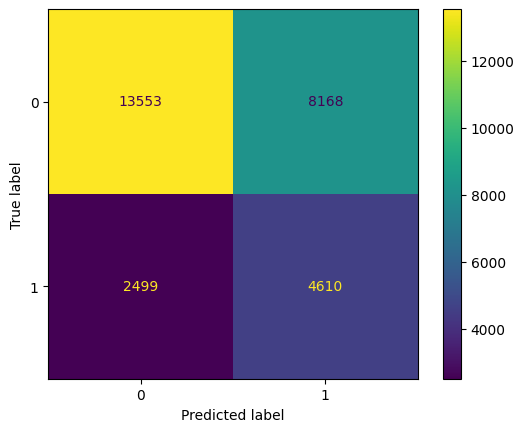

In [37]:
dt_classifier = LogisticRegression(class_weight='balanced')
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot()

### Accuracy 

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
dt_classifier = LogisticRegression(class_weight='balanced')
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)
metrics.accuracy_score(y_test, y_pred)


0.6300034686090877

### Precision

In [40]:
from sklearn.metrics import precision_score

In [41]:
dt_classifier = LogisticRegression(class_weight='balanced')
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)
metrics.precision_score(y_test, y_pred)


np.float64(0.3607763343246204)

### Recall

In [42]:
from sklearn.metrics import recall_score

In [43]:
dt_classifier = LogisticRegression(class_weight='balanced')
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)
metrics.recall_score(y_test, y_pred)


np.float64(0.6484737656491771)

### F1 Score

In [44]:
from sklearn.metrics import f1_score

In [45]:
dt_classifier = LogisticRegression(class_weight='balanced')
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)
metrics.f1_score(y_test, y_pred)


np.float64(0.4636194498918892)

### Area Under Curve(AUC)

In [46]:
import numpy as np
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

dt_classifier = LogisticRegression(class_weight='balanced')
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)


In [47]:
roc_auc

np.float64(0.6362160734695864)

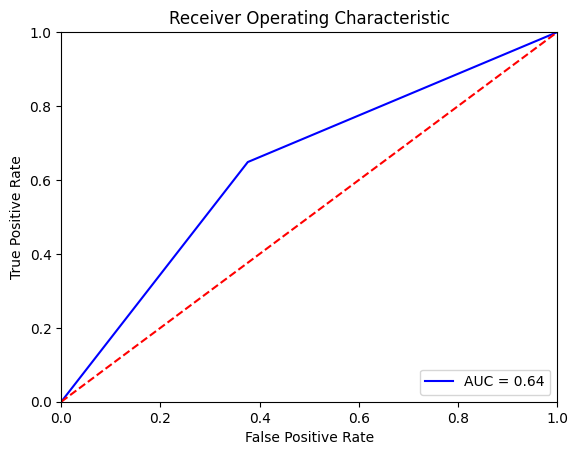

In [48]:
# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##### The classification_report function builds a text report showing the main classification metrics. 

In [49]:
dt_classifier = LogisticRegression(class_weight='balanced')
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.62      0.72     21721
           1       0.36      0.65      0.46      7109

    accuracy                           0.63     28830
   macro avg       0.60      0.64      0.59     28830
weighted avg       0.73      0.63      0.65     28830

